In [506]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

10. **(Sympy)** Muestre que el error asociado a la regla de Simpson 3/8 simple está dado por:

\begin{align}
        E = \frac{f^{(4)}(ξ)}{4!}\int_{a}^{b} (x-x_0)(x-x_1)(x-x_2)(x-x_3) dx = -\frac{3}{80}h^5f^{(4)}(ξ)
\end{align}

*Hint:* Considere la siguiente integral

\begin{align}
        I = \int_{3h}^{0} (x)(x-h)(x-2h)(x-3h) dx
\end{align}

veamos que
\begin{align}
        I &= \int_{3h}^{0} (x)(x-h)(x-2h)(x-3h) dx \\
        &=\int_{3h}^{0} x^4-6hx^3+11h^2x^2-6h^3x \\
        &=0-(\frac{(3h)^5}{5}-\frac{6h(3h)^4}{4}+\frac{11h^2(3h)^3}{3}-\frac{6h^3(3h)^2}{2}) \\
        I &=-\frac{72h^5}{80}
\end{align}

si vemos la ecuacion
\begin{align}
      E = \frac{f^{(4)}(ξ)}{4!}\int_{a}^{b} (x-x_0)(x-x_1)(x-x_2)(x-x_3) dx
\end{align}

y asumimos que $x_n = nh$. Entonces

\begin{align}
      E = \frac{f^{(4)}(ξ)}{4!}I
\end{align}

por ende

\begin{align}
      E = -\frac{72}{4!80}h^5f^{(4)}(ξ)= -\frac{3}{80}h^5f^{(4)}(ξ)
\end{align}

15. **(sympy)** Dada la aproximación de cuadratrua gausiana:
\begin{align}
        ∫_{-1}^1 f(x) = \sum_{k=0}^{n} w_k f(x_k),
\end{align}
donde $w_0, w_1, \ldots, w_n$ son los coeficientes ponderados ó pesos.

(a) Halle los ceros de los primeros 20 polinomios de Legendre

(b) Halle los pesos de ponderación para los primeros 20 polinomios de Legendre.

In [507]:
def p_n (x, n):
    poly = (1/((2**n) * sym.factorial(n))) * sym.diff(((x**2 - 1)**n), x, n)
    return poly

In [508]:
def zeros_legendre (coef):
    return np.roots(coef)

In [509]:
def weight_legendre (poly, x_k, x):
    diff = sym.lambdify(x, sym.diff(poly, x))
    return (2)/( (1 - (x_k**2)) * (diff(x_k)**2) )

In [510]:
def ej_15 (x, max):
    Z = np.array([])
    W = np.array([])
    for n in range (0, max+1):
        poly = p_n(x, n)
        #print(poly)
        coef = np.array(sym.Poly(poly, x).all_coeffs())
        #print(coef)
        Z_n = zeros_legendre(coef)
        #print(Z_n)
        Z = np.append(Z, Z_n)
        #print(Z)
        W_n = weight_legendre(poly, Z_n, x)
        #print(W_n)
        W = np.append(W, W_n)
        #print(W)
        print(f'n = {n}, \n roots = {Z_n}, \n weights = {W_n} \n')

    return Z, W

In [511]:
x = sym.Symbol('x')
ej_15(x, 20)

n = 0, 
 roots = [], 
 weights = [] 

n = 1, 
 roots = [0.], 
 weights = [2.] 

n = 2, 
 roots = [-0.57735027  0.57735027], 
 weights = [1. 1.] 

n = 3, 
 roots = [-0.77459667  0.77459667  0.        ], 
 weights = [0.55555556 0.55555556 0.88888889] 

n = 4, 
 roots = [-0.86113631  0.86113631 -0.33998104  0.33998104], 
 weights = [0.34785485 0.34785485 0.65214515 0.65214515] 

n = 5, 
 roots = [-0.90617985 -0.53846931  0.90617985  0.53846931  0.        ], 
 weights = [0.23692689 0.47862867 0.23692689 0.47862867 0.56888889] 

n = 6, 
 roots = [-0.93246951 -0.66120939  0.93246951  0.66120939 -0.23861919  0.23861919], 
 weights = [0.17132449 0.36076157 0.17132449 0.36076157 0.46791393 0.46791393] 

n = 7, 
 roots = [-0.94910791 -0.74153119 -0.40584515  0.94910791  0.74153119  0.40584515
  0.        ], 
 weights = [0.12948497 0.27970539 0.38183005 0.12948497 0.27970539 0.38183005
 0.41795918] 

n = 8, 
 roots = [-0.96028986 -0.79666648  0.96028986  0.79666648 -0.52553241  0.52553241
 -0.183

(array([ 0.        , -0.57735027,  0.57735027, -0.77459667,  0.77459667,
         0.        , -0.86113631,  0.86113631, -0.33998104,  0.33998104,
        -0.90617985, -0.53846931,  0.90617985,  0.53846931,  0.        ,
        -0.93246951, -0.66120939,  0.93246951,  0.66120939, -0.23861919,
         0.23861919, -0.94910791, -0.74153119, -0.40584515,  0.94910791,
         0.74153119,  0.40584515,  0.        , -0.96028986, -0.79666648,
         0.96028986,  0.79666648, -0.52553241,  0.52553241, -0.18343464,
         0.18343464, -0.96816024, -0.83603111, -0.61337143, -0.32425342,
         0.96816024,  0.83603111,  0.61337143,  0.32425342,  0.        ,
        -0.97390653, -0.86506337, -0.67940957,  0.97390653,  0.86506337,
         0.67940957, -0.43339539,  0.43339539, -0.14887434,  0.14887434,
        -0.97822866, -0.8870626 , -0.73015201, -0.51909613, -0.26954316,
         0.97822866,  0.8870626 ,  0.73015201,  0.51909613,  0.26954316,
         0.        , -0.98156063, -0.90411726, -0.7

16. Estime la siguiente integral usando el método de cuadratura de Gaus-Legendre:

\begin{align}
        ∫_{0}^\infty \frac{1}{x^4 + 1} ≈ 1.110721
\end{align}

*Hint:* Dividir la integral para tener dos integrales con límites $[-1,1]$ y $[0,1]$.

In [512]:
def ej_16_parte (x, n, f, a=0, b=1):
    #f = sym.lambdify(x, (x**2/(x**4 + x)))
    poly = p_n(x, n)
    coef = np.array(sym.Poly(poly, x).all_coeffs())
    roots = zeros_legendre(coef)
    weights = weight_legendre(poly, roots, x)
    roots = 0.5 * (b - a) * roots + 0.5 * (b + a)
    weights = 0.5 * (b - a) * weights
    return weights @ f(roots)

In [513]:
def ej_16_2 (x, n, f):
    poly = p_n(x, n)
    coef = np.array(sym.Poly(poly, x).all_coeffs())
    roots = zeros_legendre(coef)
    weights = weight_legendre(poly, roots, x)
    return weights @ f(roots)

In [514]:
def ej_16 (x, n, f, f2):
    return ej_16_parte(x, n, f) + ej_16_parte (x, n, f2)

In [515]:
x = sym.Symbol('x')
f_16 = 1/(x**4 + 1)
f_16 = sym.lambdify(x, f_16)
f_16_cambio = x**2/(x**4 + 1)
f_16_cambio = sym.lambdify(x, f_16_cambio)
ej_16(x, 20, f_16, f_16_cambio)

1.1107207345423264

In the black-body radiation problem the following integral appears:

\begin{align}
        ∫_{0}^\infty \frac{x^3}{e^x - 1} dx ≈ \frac{\pi^4}{15}.
\end{align}

a) Compute this integral using the Gauss-Laguerre quadrature method for $n=3$ evaluation
points.

b) For this estimation, plot the relative error $(ϵ_r(n) = I_{estimated}(n)/I_{exact})$ as a function
of the evaluation points, with $n = [2, 3, ..., 10]$.

In [519]:
I_exact = (np.pi**4)/15

In [528]:
def p_n (x, n):
    poly = (1/((2**n) * sym.factorial(n))) * sym.diff(((x**2 - 1)**n), x, n)
    return poly

In [533]:
def ej_17 (x, n, f):
    poly = p_n(x, n)
    coef = np.array(sym.Poly(poly, x).all_coeffs())
    roots = zeros_legendre(coef)
    weights = weight_legendre(poly, roots, x)
    #print(f'{poly}\n {coef} \n {roots} \n {weights}')
    root =
    return weights @ f(roots)

5.106522428445981
6.493939402266828
0.7863520295036102


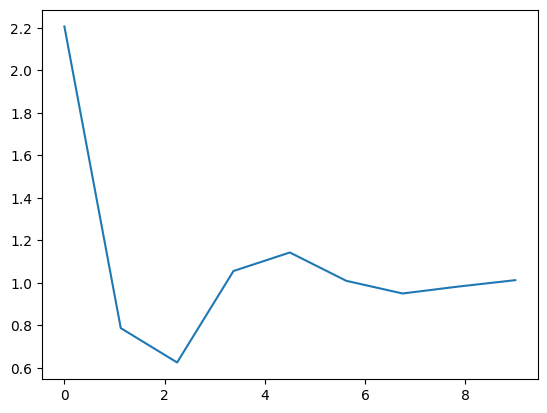

In [542]:
X = np.linspace(0, 9, 9)
f = x**3/(sym.exp(x) - 1)
fe = (((1-x)/(1+x))**3/(sym.exp((1-x)/(1+x)) - 1)) * (2/((1+x)**2))
fe = sym.lambdify(x, fe)
E = np.zeros(9)
n3 = ej_17(x, 3, fe)
print(n3)
print(I_exact)
e = n3/I_exact
print(e)
for n in range (2, 11):
    I_estimated = ej_17(x, n, fe)
    e = I_estimated/I_exact
    #print(I_estimated)
    #print(I_exact)
    E[n-2] = e
plt.plot(X, E)

In [ ]:
x = sym.Symbol('x')
f_17 = sym.Piecewise(
    (x**3 / (sym.exp(x) - 1), x > 0),
    (x**2 / 2, x == 0)
)
f_17 = sym.lambdify(x, f_17)
ej_17(x, 3, f_17)

21. Una función se puede representar como una combinación lineal de $N + 1$ polinomios de
Legendre $P_n(x), n = 0, 1, \ldots ,N$.

\begin{align}
        f(x) = \sum_{n = 0}^{N} c_n P_n(x)
\end{align}

El problema computacional requiere la estimación de los coeficientes de la expansión. Sea la función signo:

\begin{align}
        sgn(x) = \left\{ \begin{array}{lcc} -1 & x < 0 \\ \\
                                            0 & x = 0 \\ \\
                                            +1 & x > 0
                                            \end{array} \right.
\end{align}

(a) **(Theoretical)** Usando las relaciones de ortogonalidad de los polinomios de Legendre, muestre que los coeficientes están dados por:

\begin{align}
        c_n = \frac{2n + 1}{2} \int_{-1}^{1} f(x)P_n(x) dx , n = 0, 1, \ldots, N
\end{align}

(b) Implemente la función sgn(x).

(c) Vectorice y dibuje la función.

(d) Defina los puntos y los pesos de Gauss- Legendre al grado $n = 15$.

(e) Cree y guarde los polinomios de Legendre al grado $N = 20$.

(f) Cree una función que calcule los $N + 1$ coeficientes en un array de numpy

(g) Calcule la combinación lineal para cada valor del dominio que uso para dibujar la función original.

(h) Dibuje la representaci´on en la base de Legendre para obtener:

Teniendo:
\begin{align}
        f(x) = \sum_{n = 0}^{N} c_n P_n(x)
\end{align}

por la ortogonalidad de P_n sabemos que

\begin{align}
        \int_{-1}^{1} f(x)P_n(x) dx = \int_{-1}^{1} \sum_{m=0}^{N} c_n P_m(x)P_n(x) dx = c_n\int_{-1}^{1} P_mP_n = c_n\frac{2}{2n+1}
\end{align}

In [ ]:
def sgn(x):
    return np.where(x < 0, -1, np.where(x > 0, 1, 0))

In [ ]:
X = np.linspace(-1, 1, 100)
Y = sgn(X)

In [ ]:
plt.plot(X, Y)

In [ ]:
def poly (x, n):
    poly = 1/( ((2**n) * sym.factorial(n)) ) * (sym.diff(((x**2 - 1)**n), x, n))
    return poly

In [ ]:
def roots (x, poly):
    return np.roots(np.array(sym.Poly(poly, x).all_coeffs()))

In [ ]:
def weight_legendre (poly, x_k, x):
    diff = sym.lambdify(x, sym.diff(poly, x))
    return (2)/( (1 - (x_k**2)) * (diff(x_k)**2) )

In [ ]:
def d_21 (x, n):
    poly_d = poly(x, n)
    puntos = roots(x, poly_d)
    weight = weight_legendre(poly_d, puntos, x)
    return puntos, weight

In [ ]:
x = sym.Symbol('x')
d_21(x, 15)

In [ ]:
def e_21 (N, x,X):
    P = np.zeros(N)
    for n in range (0, N):
        poly_e = sym.lambdify(x, poly(x, n))
        #print(poly_e(x))
        P[n] = poly_e(X[n])
    return P

In [ ]:
def f_21 (N, x, f, X, P):
    Cn = np.zeros(N)
    sgm_n = sym.Piecewise((-1, x < 0), (0, x == 0), (1, x > 0))
    for n in range (0, N):
        puntos, weight = d_21(x, n)
        #print(weight)
        Cn[n] = ((2*n + 1)/2) * np.sum(weight * f(puntos) * P(puntos))
        #print(weight * f(puntos) * poly_f(X[n-1]))
        #print(f(X[n-1]))
    return Cn

In [ ]:
def C_lineal (N, Cn, X, P):
    L = np.zeros_like(X)
    for n in range(N):
        #print(P)
        L += Cn[n] * P[n]
    return L

In [ ]:
P = e_21(20, x, X)
f = np.vectorize(sgn)
Cp = f_21(20, x, f, X, P)
L = C_lineal (20, Cp, X, P)
#print(Cp)
Cp

In [ ]:
plt.plot(X, Y)
plt.plot(X, L, 'r')